In [153]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import glob
import numpy as np
import seaborn as sns
import os
from PIL import Image

In [135]:
def get_paths(data_path):

    masks_paths = sorted(glob.glob(f'{data_path}/masks/*'))
    image_paths = sorted(glob.glob(f'{data_path}/cropped_frames/*'))
    return masks_paths, image_paths


In [136]:
def extract_roi(masks_paths, bottom=450):
    masks = np.array([np.load(i) for i in masks_paths])
    center = masks.shape[-1] // 2

    bottom_left = masks[:, bottom:, :center]
    bottom_right = masks[:, bottom:, center:]
    upper_left = masks[:, :bottom, :center]
    upper_right = masks[:, :bottom, center:]

    return bottom_left, bottom_right, upper_left, upper_right

def get_area(masks):
    return np.sum(masks, axis=(1,2))

In [137]:
def plot_area(ax, area, title):
    plt.rcParams["figure.frameon"] = False
    cmap = plt.get_cmap('viridis')
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

    ax.plot(area, color='grey', alpha=0.7)
    ax.scatter(range(len(area)), area, color=cmap(6), alpha=1, s=20, marker="o", 
                    facecolors='none')
    ax.set_title(title)
    ax.set_xlabel(r'Time (minutes)')
    ax.set_ylabel(r'Relative area')
    sns.despine(
        trim=True,
        
    )
    return ax

In [189]:
def overlay_segmentation_cv(ind, image_paths, masks, color, alpha=0.4):
    image = cv2.imread(image_paths[ind])
    mask = masks[ind]
    overlay = np.zeros_like(image)
    overlay[mask > 0] = color_upper
    cv2.addWeighted(overlay, alpha, image, 1 - alpha, 0, image)
    
    return image


In [190]:

data_path = 'data/ant_video_2'
masks_paths, image_paths = get_paths(data_path)
masks = np.array([np.load(i) for i in masks_paths])
bottom_left, bottom_right, upper_left, upper_right = extract_roi(masks_paths)

print(f'Number of masks: {len(masks_paths)}, Number of images: {len(image_paths)}')
assert len(masks_paths) == len(image_paths)

area_bottom_left = get_area(bottom_left)
area_bottom_right = get_area(bottom_right)
area_upper_left = get_area(upper_left)
area_upper_right = get_area(upper_right)

Number of masks: 122, Number of images: 122


<Axes: title={'center': 'Ant video 2'}, xlabel='Time (minutes)', ylabel='Relative area'>

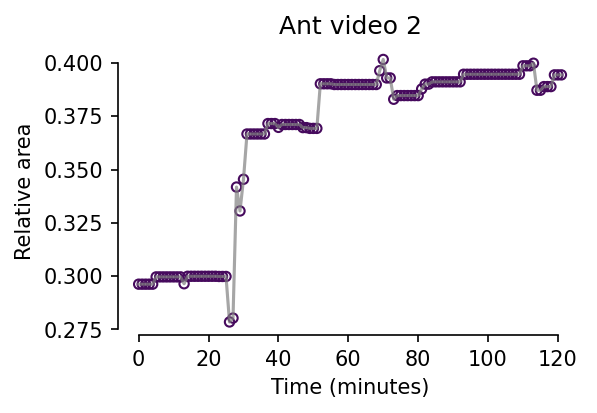

In [191]:
ax = plt.figure(figsize=(4, 2.5), dpi = 150).add_subplot(111)
plot_area(ax, area_right / (area_right + np.sum(bottom_right, axis=(1, 2))), 'Ant video 2')

In [202]:
color = plt.get_cmap('viridis')(3)
color = [255* i for i in color[:3]]

[69.182775, 5.08521, 88.553595]

In [213]:
image_mask = overlay_segmentation_cv(40, image_paths, masks, color)

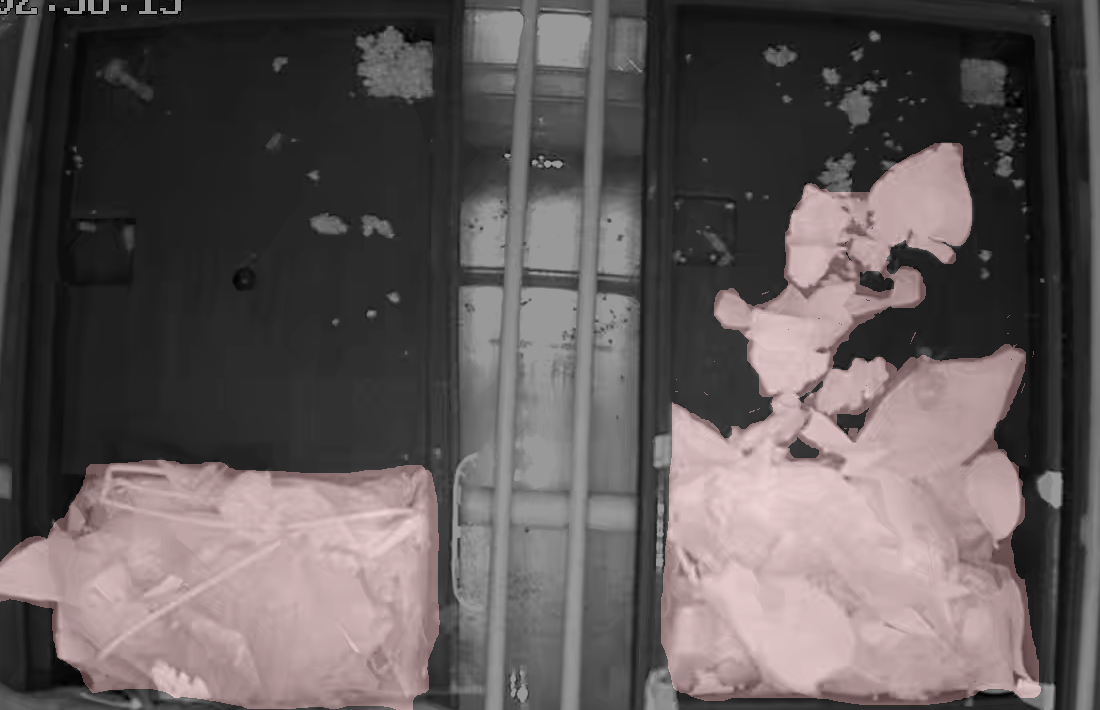

In [214]:
Image.fromarray(image_mask)